# Facet

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates, radviz

def graph_facet_qsvm(file_path):
    df = pd.read_csv(file_path)
    # 1) Pivot the data
    pivot = df.pivot_table(
        index="reps", columns="C", values="accuracy"
    )
    
    # 2) Draw heatmap
    g = sns.FacetGrid(
        df, col="entanglement",
        col_wrap=3, height=4, sharex=True, sharey=True
    )
    g.map_dataframe(
        lambda data, **kws: sns.heatmap(
            data.pivot_table(index="reps", columns="C", values="accuracy"),
            vmin=0, vmax=1, annot=True, fmt=".2f", cbar=False, cmap="Greens"
        )
    )
    for ax in g.axes.flat:
        ax.set_xlabel("C"); ax.set_ylabel("reps")
    g.fig.subplots_adjust(top=0.85)
    # g.fig.suptitle("Accuracy Heatmaps by Entanglement", fontsize=14)
    plt.savefig(f'QSVR/zz/figure/{date}.png')
    plt.show()


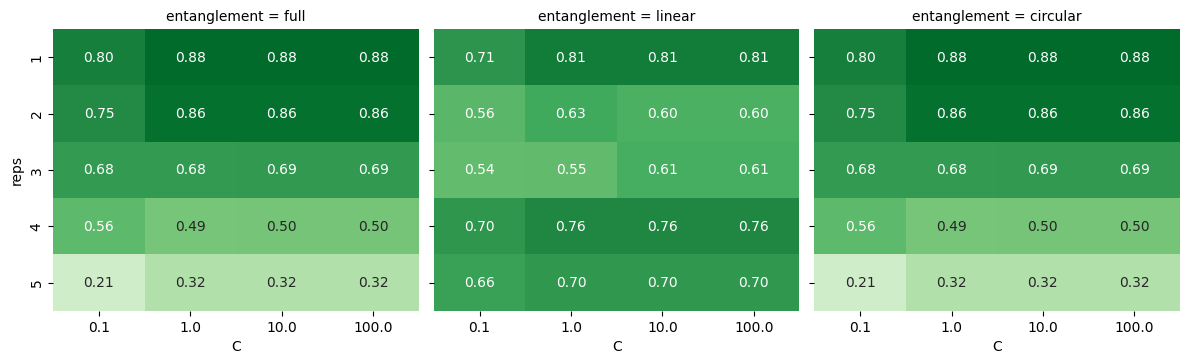

In [46]:


date = '5_02_25_0'
file_path = f'QSVR/zz/result/{date}_averaged.csv'
graph_facet_qsvm(file_path)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
np.set_printoptions(threshold=sys.maxsize)

def graph_full_qnn(date, file_path):
    # df = pd.read_csv('qml_training-validation-data.csv')
    # assert(len(df) == 21)
    
    df = pd.read_csv(file_path)

    def convert_to_float_list(string):
        string = string.strip('[]')
        return np.array([float(x) for x in string.split()])

    def convert_to_string_list(string):
        string = string.strip('[]')
        return np.array([str(x) for x in string.split()])

    df['element test'] = df['element test'].apply(convert_to_string_list)
    df['actual'] = df['actual'].apply(convert_to_float_list)
    df['predicted'] = df['predicted'].apply(convert_to_float_list)
    
    exploded_rows = []
    for ind, row in df.iterrows():
        names = row['element test']
        actuals = row['actual']
        predictions = row['predicted']

        # print(len(names))
        # print(len(actuals))
        
        # Check if the string read from datasheet is properly seperated then converted into numpy arrays, the length will be bad is not done properly.
        if not (len(names) == len(actuals) == len(predictions)):
            raise ValueError(f"Row {ind} does not have matching list lengths. Need more data processing.")
            
        for name, act, pred in zip(names, actuals, predictions):
            exploded_rows.append({'element test': name, 'actual': act, 'predicted': pred})
    
    # Create a new DataFrame from the exploded data
    df_exploded = pd.DataFrame(exploded_rows)

    print(df_exploded)
    
    # Determine the global min and max for drawing the ideal line (y=x)
    min_val = min(df_exploded['actual'].min(), df_exploded['predicted'].min())
    max_val = max(df_exploded['actual'].max(), df_exploded['predicted'].max())
    
    # Prepare the plot
    plt.figure(figsize=(8, 6))
    
    # unique_names = df_exploded['element test'].unique()
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(df_exploded)//21))
    legend_patches = [
        mpatches.Patch(color=colors[0], label='Repeat 1'),
        mpatches.Patch(color=colors[1], label='Repeat 2'),
        mpatches.Patch(color=colors[2], label='Repeat 3')
    ]
    
    # Plot a scatter for each name in the DataFrame
    for ind, row in df_exploded.iterrows():
        plt.scatter(row['actual'], row['predicted'],label=row['element test'], color=colors[ind//21], s=50, alpha=0.8)
    
    # Plot the ideal line (where predicted equals actual)
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal')
    
    # Add labels and title
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    # plt.title('Actual vs. Predicted per Element Across Repeats')
    plt.legend(handles=legend_patches)
    plt.tight_layout()
    # plt.savefig(f'QNN/figure/{date}/{date}_ideal_line.png')
    # plt.show()
    plt.close()


In [2]:
for i in range(1, 1):
    date = f'05_15_25_{i}'
    file_path = f'QNN/classification/result/{date}.csv'
    graph_full_qnn(date, file_path)

   element test     actual  predicted
0          'Be'  23.480001  27.611809
1          'Tc'  36.190000  32.619183
2          'Nd'   0.250000  10.200697
3          'Ti'  24.440000  20.494701
4           'Y'   8.520000   7.550869
..          ...        ...        ...
58         'Ho'   7.820000   8.723334
59         'Os'  38.540000  27.606997
60         'Co'  37.640000  26.835640
61         'Dy'   7.060000   8.936225
62         'Er'   8.450000  11.384655

[63 rows x 3 columns]
   element test     actual  predicted
0          'Zn'  20.980001  16.938690
1          'Ho'   7.820000   8.546034
2          'Re'  35.350000  24.531185
3          'Tc'  36.190000  28.231512
4          'Nd'   0.250000   9.298538
..          ...        ...        ...
58         'Co'  37.640000  23.572594
59         'Tm'   8.960000  12.321216
60         'Ti'  24.440000  19.900593
61         'Dy'   7.060000   8.664179
62         'Ho'   7.820000   9.377176

[63 rows x 3 columns]
   element test     actual  predicted
0   


KeyboardInterrupt



<Figure size 800x600 with 0 Axes>

# 